# Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Sigmoide:

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Definição de hiperparameters:

In [3]:
dataSetColumns = [ 'Area', 'NumAmostra', 'Referencia', 'Output1', 'Output2' ] # explicação no PDF
learnrate = 0.1
epochs = 10000 # reduzido para 10000 pois 200000 não resultava em uma acurácia melhor
N_layers = [len(dataSetColumns) -2,4,2]

print("N_: {}".format(N_layers))
print("learnrate: ", learnrate)
print("epochs: ", epochs)

N_: [3, 4, 2]
learnrate:  0.1
epochs:  10000


### Lendo o CSV 

In [4]:
DataSet = pd.read_csv('arruela_.csv')
DataSet.drop(['Hora', 'Tamanho', 'Delta'],axis=1,inplace=True)

DataSet.describe()

,Referencia,NumAmostra,Area,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,58.310345,59.777778,63.697318,0.375479,0.624521
std,9.199888,17.293075,30.629366,0.485177,0.485177
min,25.000000,3.000000,6.000000,0.000000,0.000000
25%,54.000000,50.000000,46.000000,0.000000,0.000000
50%,64.000000,59.000000,56.000000,0.000000,1.000000
75%,64.000000,69.000000,68.000000,1.000000,1.000000
max,64.000000,120.000000,201.000000,1.000000,1.000000


### Analise

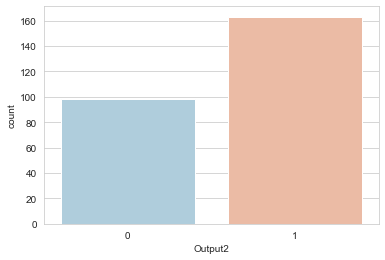

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

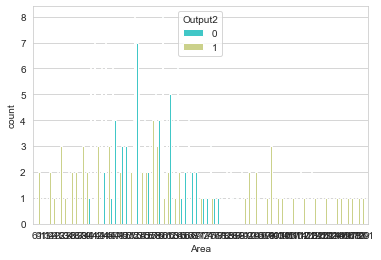

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

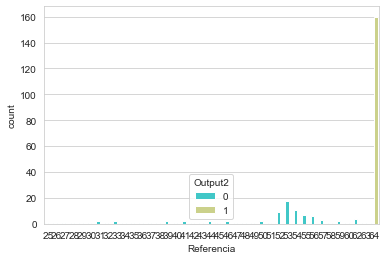

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Referencia',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

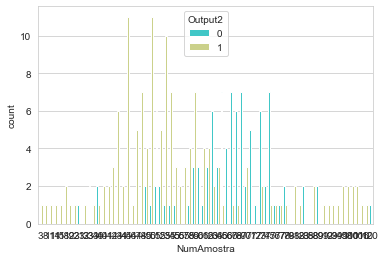

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

#### Algumas questões importantes

1. Pelo menos um dos preditores x1, x2, ... ,x5 é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar y, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

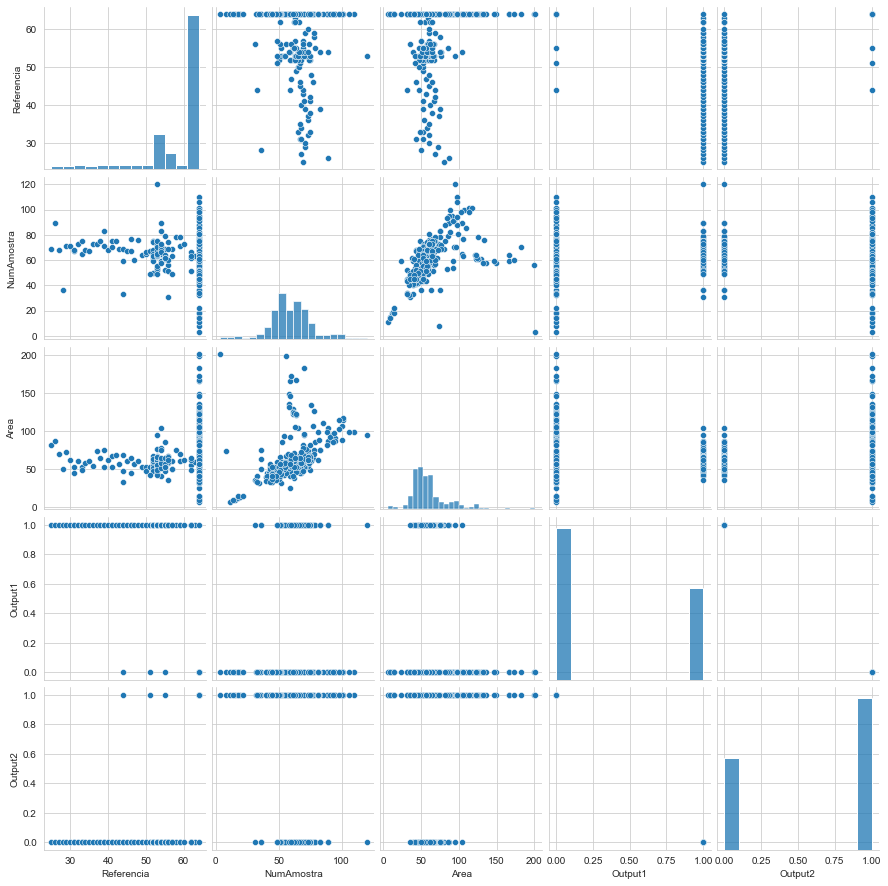

In [9]:
sns.pairplot(DataSet)
plt.show()

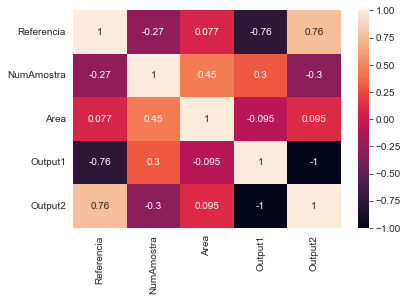

In [10]:
sns.heatmap(DataSet.corr(), annot = True)
plt.show()

### Definindo columnas de entrada e saida

In [11]:
scaler = StandardScaler()
DataScaled = scaler.fit_transform(DataSet)
DataSetScaled = pd.DataFrame(np.array(DataScaled),columns = dataSetColumns)

X = DataSetScaled.drop(['Output1', 'Output2'],axis=1) # in
y = DataSet[['Output1','Output2']] # out

print(X)
print(y)

         Area  NumAmostra  Referencia
0   -3.627690    0.534314    0.565990
1   -3.518784    1.693069    0.762257
2   -3.409879    0.476377    0.173457
3   -3.300973   -1.377630   -0.448055
4   -3.192067    0.650190    0.271590
..        ...         ...         ...
256  0.619637    0.881941    0.598701
257  0.619637   -2.188758   -1.625656
258 -1.558480   -1.551443   -1.036855
259  0.619637   -0.856191   -0.906011
260  0.619637   -0.856191   -0.742455

[261 rows x 3 columns]
     Output1  Output2
0          1        0
1          1        0
2          1        0
3          1        0
4          1        0
..       ...      ...
256        0        1
257        0        1
258        0        1
259        0        1
260        0        1

[261 rows x 2 columns]


#### Definindo valor para treino e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
n_records, n_features = X_train.shape

print("Tamanho da bases de treino: {} \nTamanho da base de validação: {}".format(len(X_train),len(X_test)))
print(X_train.shape)

Tamanho da bases de treino: 174 
Tamanho da base de validação: 87
(174, 3)


#### Definição de Pesos para a camada oculta

In [18]:
weights_hidden_input = np.random.normal(0, scale=0.1, size=(N_layers[0], N_layers[1])) 
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_layers[1], N_layers[2]))

print(weights_hidden_input)
print(weights_hidden_output)

[[-0.05943058  0.01689381  0.02545086 -0.07307245]
 [-0.0187793  -0.00085511 -0.08454384 -0.03137551]
 [-0.03478643  0.29380379 -0.01213254 -0.09496438]]
[[ 0.20384736 -0.05566472]
 [ 0.06278834  0.11237553]
 [-0.13586092  0.18086733]
 [-0.03459431  0.06902765]]


### Criação de variaveis para plot

In [14]:
last_loss = None
EvolucaoError = []
IndiceError = []

## Iterações 

In [15]:
for e in range(epochs):
    delta_w_i_h = np.zeros(weights_hidden_input.shape)
    delta_w_o_h = np.zeros(weights_hidden_output.shape)
    
    for xi, yi in zip(X_train.values, y_train.values):
        #Fowards:
        hidden_layer_input = np.dot(xi, weights_hidden_input)
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
        output = sigmoid(output_layer_in)

        #Backwards
        output_error_term = (yi - output) * output * (1 - output)
        hidden_error = np.dot(weights_hidden_output,output_error_term)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
        delta_w_o_h += output_error_term*hidden_layer_output[:, None]
        delta_w_i_h += hidden_error_term * xi[:, None]
          
    #Atualização de pesos
    weights_hidden_input += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_o_h / n_records

    if  e % (epochs / 50) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_hidden_input))
        out = sigmoid(np.dot(hidden_output, weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        print(e, "Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando" if last_loss and last_loss < loss else "")
        last_loss = loss

        EvolucaoError.append(loss)
        IndiceError.append(e)


0 Erro quadrático no treinamento:  0.23725567413974244 
200 Erro quadrático no treinamento:  0.33922148311281164  Atenção: O erro está aumentando
400 Erro quadrático no treinamento:  0.3408750136051799  Atenção: O erro está aumentando
600 Erro quadrático no treinamento:  0.3143752620265414 
800 Erro quadrático no treinamento:  0.29046229797797374 
1000 Erro quadrático no treinamento:  0.27356602042169825 
1200 Erro quadrático no treinamento:  0.2607303843935771 
1400 Erro quadrático no treinamento:  0.24769968453563546 
1600 Erro quadrático no treinamento:  0.22724243317995496 
1800 Erro quadrático no treinamento:  0.18459947859903578 
2000 Erro quadrático no treinamento:  0.11909012785015737 
2200 Erro quadrático no treinamento:  0.06829349608508703 
2400 Erro quadrático no treinamento:  0.040456618262361695 
2600 Erro quadrático no treinamento:  0.025691712540118566 
2800 Erro quadrático no treinamento:  0.017403091189248036 
3000 Erro quadrático no treinamento:  0.012427559513207412

### Evolução do erro

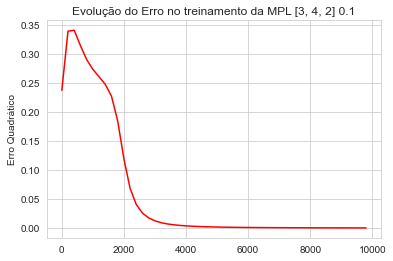

In [16]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL {} {}'.format(N_layers, learnrate))
plt.show()

Se o random dos pesos da camada oculta deu certo(ou errado), vai ter um _bump_ entre 1500-3000, não sei explicar essa desaceleração da queda do erro.

## Validação

In [17]:
n_records, n_features = X_test.shape
predictions = 0

for xi, yi in zip(X_test.values, y_test.values):
    hidden_layer_input = np.dot(xi, weights_hidden_input)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
    output = sigmoid(output_layer_in)

    if ((output[0]>output[1] and yi[0]>yi[1]) or (output[1]>=output[0] and yi[1]>yi[0])):
        predictions+=1
                
print("A Acurácia da Predição é de: {:.5f}".format(predictions/n_records))

A Acurácia da Predição é de: 0.954
